In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing training data
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.describe

<bound method NDFrame.describe of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
# Columns with missing values
print("Missing values:\n", train.isnull().sum())

Missing values:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


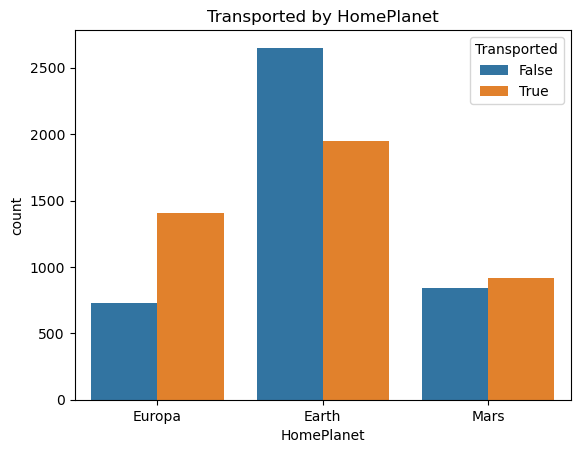

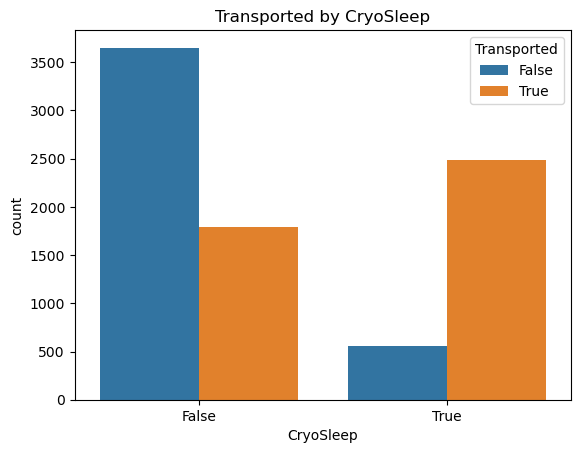

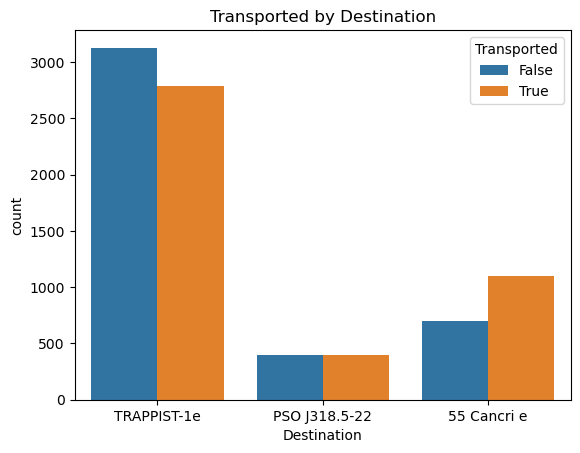

In [7]:
# HomePlanet vs Transported
sns.countplot(x='HomePlanet', hue='Transported', data=train)
plt.title('Transported by HomePlanet')
plt.show()

# CryoSleep vs Transported
sns.countplot(x='CryoSleep', hue='Transported', data=train)
plt.title('Transported by CryoSleep')
plt.show()

# Destination vs Transported
sns.countplot(x='Destination', hue='Transported', data=train)
plt.title('Transported by Destination')
plt.show()

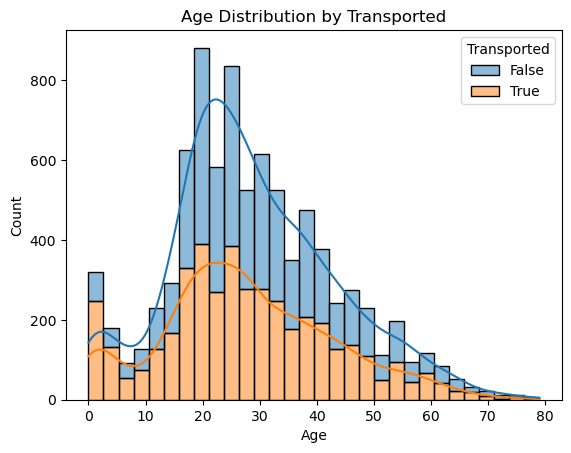

In [8]:
# Age distribution by Transported
sns.histplot(data=train, x='Age', hue='Transported', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Transported')
plt.show()

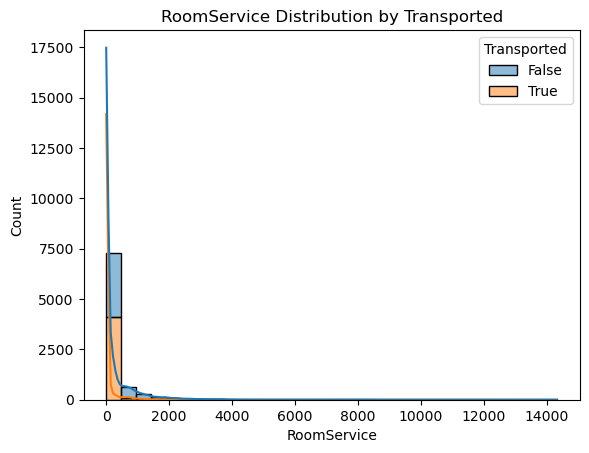

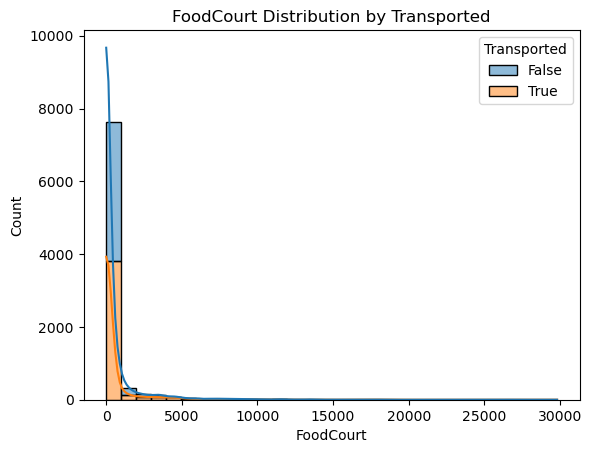

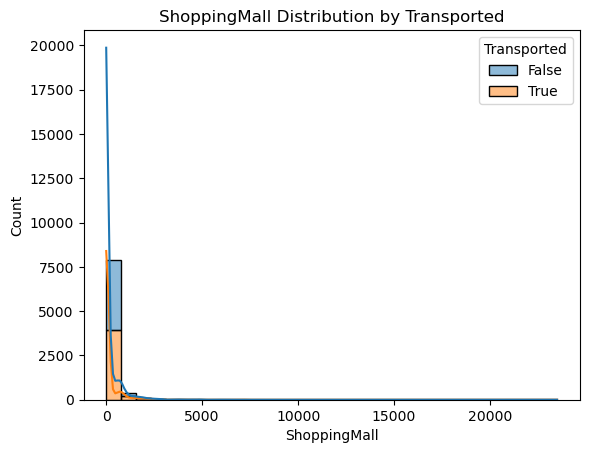

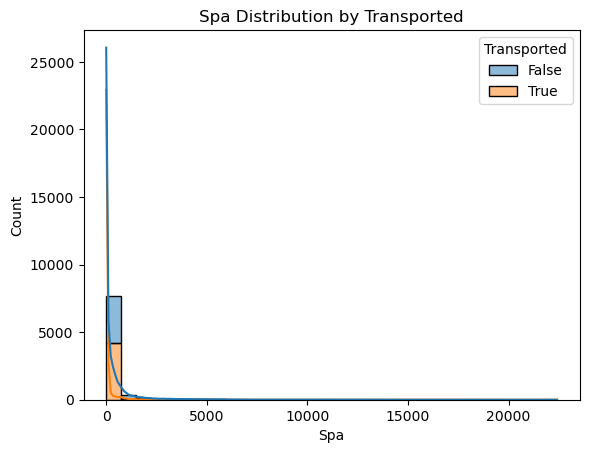

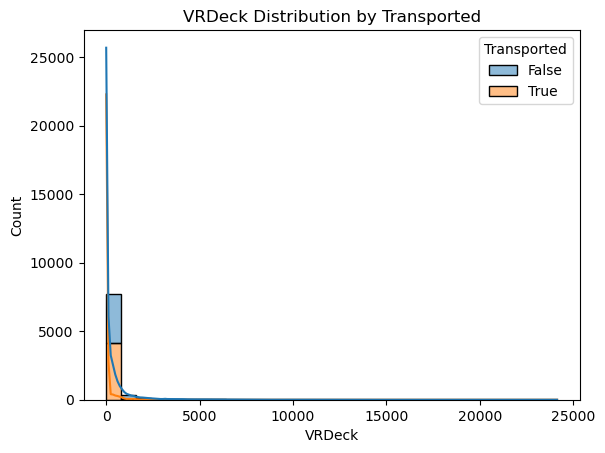

In [9]:
# Distribution of spending categories by Transported
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in spending_cols:
    sns.histplot(data=train, x=col, hue='Transported', bins=30, kde=True, multiple='stack')
    plt.title(f'{col} Distribution by Transported')
    plt.show()

In [10]:
#Extract Group ID from PassengerId
def extract_group(df):
    df['Group'] = df['PassengerId'].str.split('_').str[0]
    return df

train = extract_group(train)
test = extract_group(test)

In [11]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280


In [12]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273


In [13]:
#Feature Engineering
def engineer(df):
    df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
    df['Num'] = pd.to_numeric(df['Num'], errors='coerce')

    # Spending features
    spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    df[spend_cols] = df[spend_cols].fillna(0)
    df['TotalSpend'] = df[spend_cols].sum(axis=1)
    df['SpendZero'] = (df['TotalSpend'] == 0).astype(int)
    df['TotalSpend_log'] = np.log1p(df['TotalSpend'])

    # Fill key nulls
    df['HomePlanet'] = df['HomePlanet'].fillna('Earth')
    df['Destination'] = df['Destination'].fillna('TRAPPIST-1e')
    df['CryoSleep'] = df['CryoSleep'].fillna(False).astype(int)
    df['VIP'] = df['VIP'].fillna(False).astype(int)
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Num'] = df['Num'].fillna(df['Num'].median())
    df['Deck'] = df['Deck'].fillna('F')
    df['Side'] = df['Side'].fillna('S')

    # Drop unnecessary
    df.drop(['Name', 'Cabin'], axis=1, inplace=True)
    
    return df

train = engineer(train)
test = engineer(test)

C:\Users\prate\AppData\Local\Temp\ipykernel_38224\1843041705.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep'] = df['CryoSleep'].fillna(False).astype(int)
C:\Users\prate\AppData\Local\Temp\ipykernel_38224\1843041705.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VIP'] = df['VIP'].fillna(False).astype(int)
C:\Users\prate\AppData\Local\Temp\ipykernel_38224\1843041705.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=

In [14]:
# 4. Encode categorical
all_data = pd.concat([train.drop('Transported', axis=1), test])
cat_cols = ['HomePlanet', 'Destination', 'Deck', 'Side', 'Group']
all_data = pd.get_dummies(all_data, columns=cat_cols)

X = all_data.iloc[:len(train), :].drop(['PassengerId'], axis=1)
X_test = all_data.iloc[len(train):, :].drop(['PassengerId'], axis=1)
y = train['Transported'].astype(int)

In [15]:
X

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,TotalSpend,...,Group_9271,Group_9272,Group_9273,Group_9274,Group_9275,Group_9276,Group_9277,Group_9278,Group_9279,Group_9280
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0.0,736.0,...,False,False,False,False,False,False,False,False,False,False
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0.0,10383.0,...,False,False,False,False,False,False,False,False,False,False
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0.0,5176.0,...,False,False,False,False,False,False,False,False,False,False
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1.0,1091.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,98.0,8536.0,...,False,False,False,False,False,True,False,False,False,False
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,1499.0,0.0,...,False,False,False,False,False,False,False,True,False,False
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1500.0,1873.0,...,False,False,False,False,False,False,False,False,True,False
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,608.0,4637.0,...,False,False,False,False,False,False,False,False,False,True


In [16]:
X_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,TotalSpend,...,Group_9271,Group_9272,Group_9273,Group_9274,Group_9275,Group_9276,Group_9277,Group_9278,Group_9279,Group_9280
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,4.0,2832.0,...,False,False,False,False,False,False,False,False,False,False
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1.0,7418.0,...,False,False,False,False,False,False,False,False,False,False
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,5.0,645.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1496.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4273,0,42.0,0,0.0,847.0,17.0,10.0,144.0,442.0,1018.0,...,False,False,False,False,False,False,False,False,False,False
4274,1,26.0,0,0.0,0.0,0.0,0.0,0.0,296.0,0.0,...,True,False,False,False,False,False,False,False,False,False
4275,0,26.0,0,0.0,2680.0,0.0,0.0,523.0,297.0,3203.0,...,False,False,True,False,False,False,False,False,False,False


In [17]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [18]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings

In [19]:
#Encode categorical
all_data = pd.concat([train.drop('Transported', axis=1), test])
cat_cols = ['HomePlanet', 'Destination', 'Deck', 'Side', 'Group']
all_data = pd.get_dummies(all_data, columns=cat_cols)

X = all_data.iloc[:len(train), :].drop(['PassengerId'], axis=1)
X_test = all_data.iloc[len(train):, :].drop(['PassengerId'], axis=1)
y = train['Transported'].astype(int)

#Stratified K-Fold CV and XGBoost
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb = XGBClassifier(n_estimators=300,
                    max_depth=5,
                    learning_rate=0.05,
                    subsample=0.9,
                    colsample_bytree=0.9,
                    eval_metric='logloss',
                    random_state=42)

scores = cross_val_score(xgb, X, y, cv=skf, scoring='accuracy')
print(f"Stratified K-Fold CV Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

Stratified K-Fold CV Accuracy: 0.8113 (+/- 0.0047)


In [ ]:
#Train final model
xgb.fit(X, y)
preds = xgb.predict(X_test)

#Submission in the format given from Kaggle
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': preds.astype(bool)
})
submission.to_csv('submission8.csv', index=False)
print("Submission saved as submission.csv")